IMPORTING LIBRARIES

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import xgboost as xgb
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

LOADING THE DATA

In [3]:
file_path = 'iris_dataset.csv'

In [4]:
df = pd.read_csv(file_path)

VISUALIZATION OF DATA

In [5]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.0               3.6                1.4               0.2   
1                5.0               3.0                1.6               0.2   
2                4.6               3.1                1.5               0.2   
3                4.6               3.1                1.5               0.2   
4                4.3               3.0                1.1               0.1   

  class_labels  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,300.000000,300.000000,300.000000,300.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.826680,0.435137,1.762344,0.760962
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


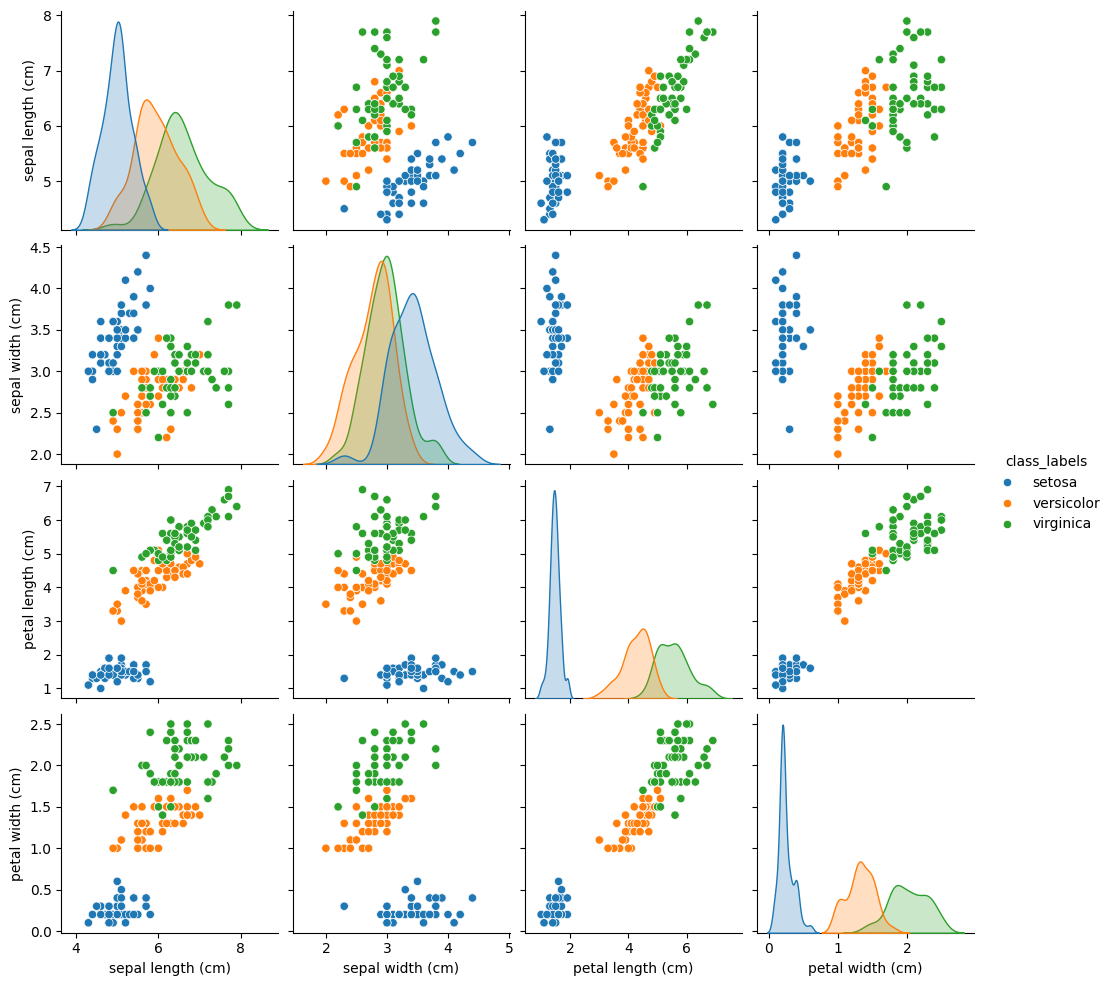

In [7]:
import seaborn as sns
sns.pairplot(df,hue='class_labels')

PREPROCESS DATA

In [8]:
data=df.values
X =data [:,0:4]
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the target variable and transform it
y = le.fit_transform(df['class_labels'])

SPLIT DATA INTO TRAINING AND TESTING SETS

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

TRAIN XGBoost MODEL

In [10]:
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    max_depth=3,
    learning_rate=0.01,
    n_estimators=50,
    reg_alpha=0.5,
    reg_lambda=0.5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

In [11]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [12]:
y_pred = xgb_clf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 98.33333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.97        20
           2       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



XGBOOST CONFUSION MATRIX

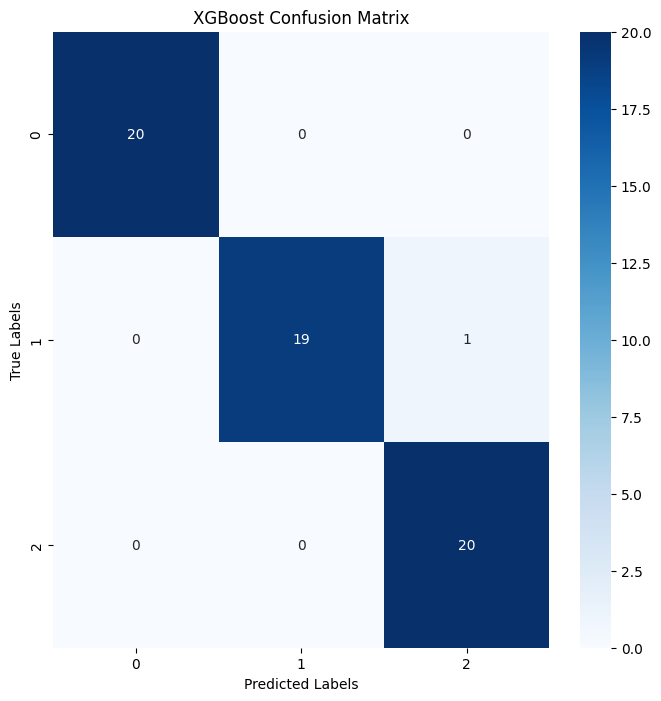

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("XGBoost Confusion Matrix")
plt.show()

RANDOM FOREST

In [15]:
rf_clf = RandomForestClassifier(
    n_estimators=20,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

In [16]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=20, random_state=42)

In [17]:
y_pred = rf_clf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 96.66666666666667
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(
    penalty='l2',
    C=0.1,
    max_iter=1000,
    random_state=42
)

In [20]:
lr_clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [21]:
y_pred = lr_clf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 96.66666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



SVM

In [23]:
from sklearn.svm import SVC
svm_clf = SVC(
    kernel='rbf',
    C=0.1,
    gamma='scale'
)

In [24]:
svm_clf.fit(X_train, y_train)

SVC(C=0.1)

In [25]:
y_pred = svm_clf.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 91.66666666666666
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.83      0.95      0.88        20
           2       0.94      0.80      0.86        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



Naive Bayes

In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb)*100)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 96.66666666666667
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



HYPERPARAMETER TUNING USING GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5]
}

grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'gamma': 0.1, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}
Best Score: 0.975


TESTING THE MODEL WITH MANUAL DATA

In [29]:
import numpy as np
X_new=np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
pred=xgb_clf.predict(X_new)
print("prediction:{}".format(pred))# here 0= setosa, 1= versicolor, 2= virginica

prediction:[0 1 2]
